# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 5
# Supervised Learning: Linear Regression

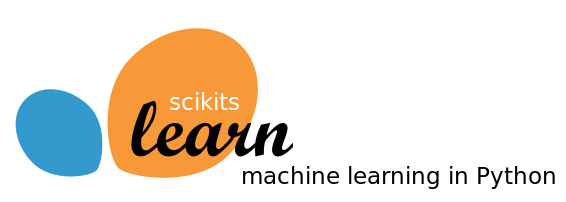

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Training Model</li>
<li> Predicting</li>
</ol>

## Learning Objectives

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

## Variables
There are 14 attributes in each case of the dataset. They are:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000

11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's (**TARGET**)

By the end of the lab, you should be able to :
- Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

- Parse columns in the dataframe to create new dataframe columns.

- Create and interpret visualizations to explore the data set and relationships between variables
- Create a simple Linear Model to predict Housing prize given features values

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston


# Part 1: Simple Linear Regression

## Loading and Cleaning data with pandas

In [2]:
data = load_boston()
for keys in data:
    print(keys)

data
target
feature_names
DESCR
filename


In [3]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [6]:
df.shape

(506, 13)

In [7]:
df['MEDV'] = data.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

## EDA

Choose any features to explore relationship with target variables.

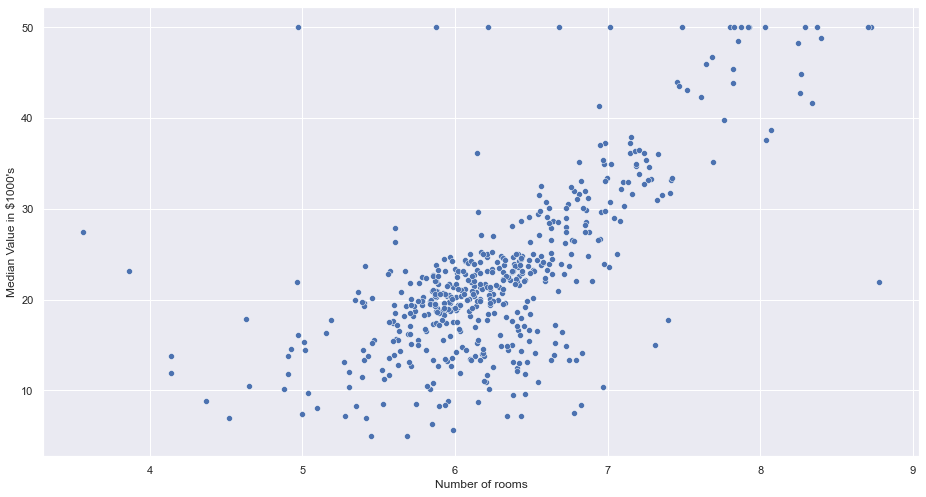

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.scatterplot(data = df,x = 'RM',y = 'MEDV')
plt.xlabel("Number of rooms")
plt.ylabel("Median Value in $1000's")
plt.show()


## Training Model

In [9]:
#create instance of LinearRegression
model = LinearRegression()
model

LinearRegression()

In [10]:
model.fit(np.array(df.RM).reshape(-1,1),df.MEDV)
model

LinearRegression()

In [11]:
model.coef_

array([9.10210898])

In [12]:
model.intercept_

-34.67062077643857

## Prediction

In [13]:
x = np.array([6.25]).reshape(-1,1)
model.predict(x)

array([22.21756036])

## Check MSE

In [14]:
x = np.array(df.RM).reshape(-1,1)

In [15]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x)

In [16]:
MSE = mean_squared_error(df.MEDV,y_pred)

In [17]:
MSE

43.60055177116956

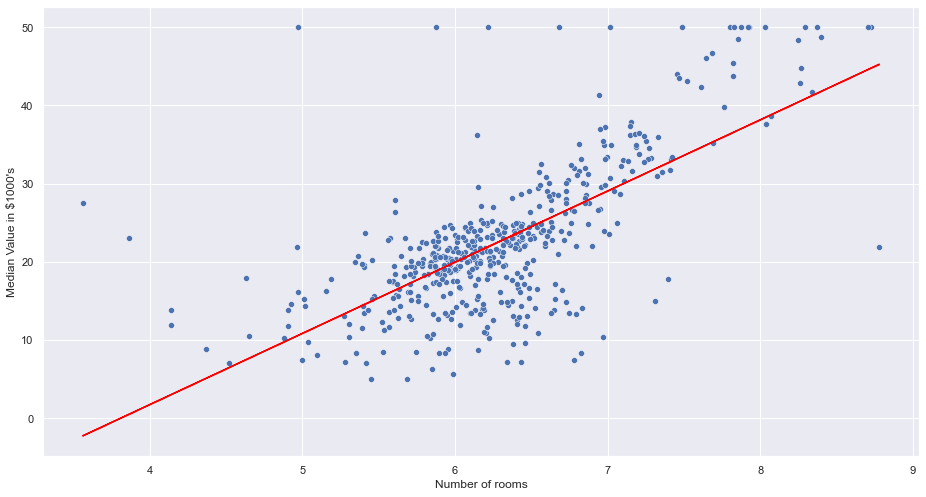

In [18]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.scatterplot(data = df,x = 'RM',y = 'MEDV')
plt.plot(x, y_pred,color='red')
plt.xlabel("Number of rooms")
plt.ylabel("Median Value in $1000's")
plt.show()

# Part 2: Multiple Linear Regression(TODO 5)

In [19]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

## EDA

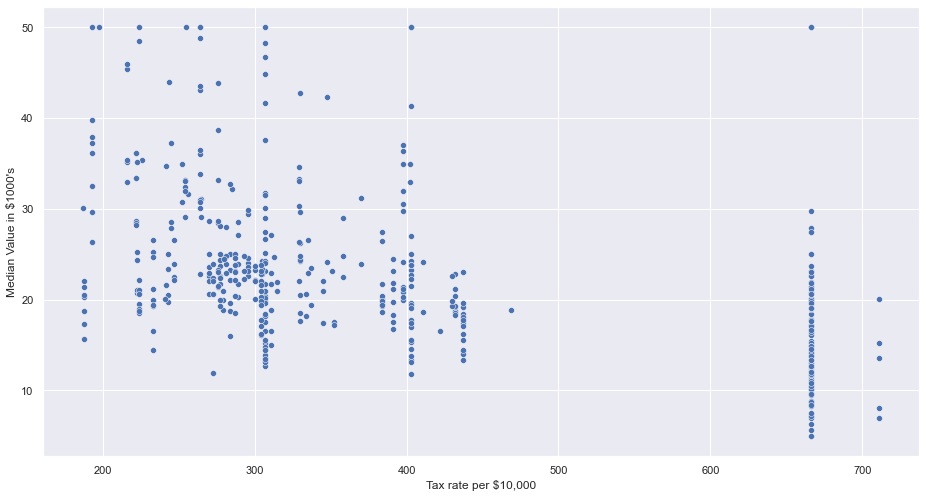

In [20]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.scatterplot(data = df, x = 'TAX', y = 'MEDV')
plt.xlabel("Tax rate per $10,000")
plt.ylabel("Median Value in $1000's")
plt.show()

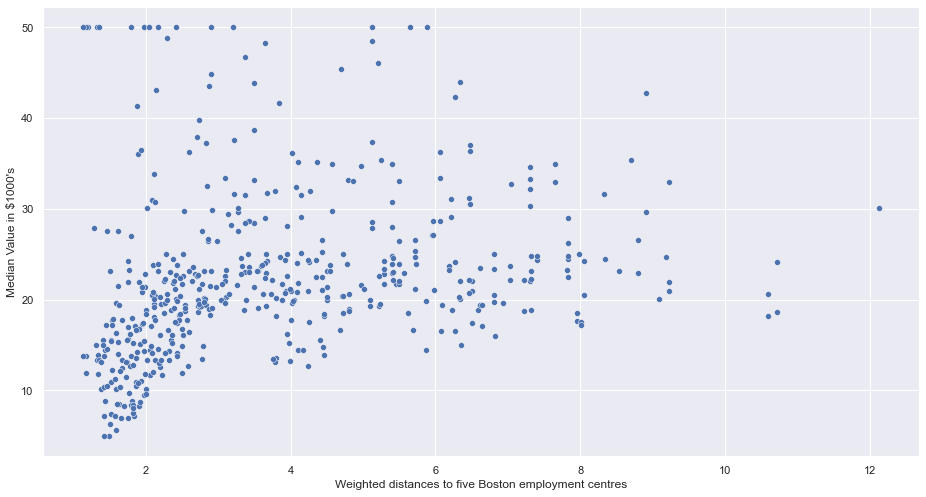

In [21]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.scatterplot(data = df, x = 'DIS', y = 'MEDV')
plt.xlabel("Weighted distances to five Boston employment centres")
plt.ylabel("Median Value in $1000's")
plt.show()

## Training Multiple Regression Model

In [22]:
#Setting the value for X and Y
x = df[['CRIM','ZN','INDUS','NOX','RM','DIS']]
y = df['MEDV']

In [23]:
x.head()

CRIM    ZN  INDUS    NOX     RM     DIS
0  0.00632  18.0   2.31  0.538  6.575  4.0900
1  0.02731   0.0   7.07  0.469  6.421  4.9671
2  0.02729   0.0   7.07  0.469  7.185  4.9671
3  0.03237   0.0   2.18  0.458  6.998  6.0622
4  0.06905   0.0   2.18  0.458  7.147  6.0622

In [24]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [25]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [26]:
#Fitting the Multiple Linear Regression model
reg = LinearRegression()
reg

LinearRegression()

In [27]:
reg.fit(x_train,y_train)
reg

LinearRegression()

In [28]:
reg.coef_

array([ -0.22340055,   0.06571269,  -0.29153848, -15.49145382,
         6.34220759,  -1.48122872])

In [29]:
reg.intercept_

0.05880538259218682

In [30]:
#Intercept and Coefficient
print("Intercept: ", reg.intercept_)
print("Coefficients:")
list(zip(x, reg.coef_))

Intercept:  0.05880538259218682
Coefficients:


[('CRIM', -0.22340054967223372),
 ('ZN', 0.06571269433300764),
 ('INDUS', -0.29153848247761),
 ('NOX', -15.49145381706325),
 ('RM', 6.3422075863574),
 ('DIS', -1.4812287244033693)]

## Predicting Value

In [31]:
x = np.array([0.05,20,9,0.6,8,7]).reshape(-1,6)
reg.predict(x)

array([29.81223023])

In [32]:
#Prediction of test set
y_pred_reg= reg.predict(x_test)

#Predicted values
print("Prediction for test set: {}".format(y_pred_reg))

Prediction for test set: [33.9126346  26.89972921 23.12003463 21.37438933 19.02742505 21.68245897
 27.26608626 23.01498128 26.9348508  19.08860052 24.21537056 15.76203784
 25.17629697 23.96733759 41.29078048 22.98509885 26.44116611 15.96444653
 32.85147979 34.55237447 32.62643806  6.60420332 22.20920707 17.40483194
 12.52674986 16.77210678 27.70886779 21.89012795 14.9264175  20.14933834
 17.20252459 22.81802028 41.37435039 24.26217777 31.34208633 27.72419808
  8.52890798 12.42456301 19.05651685 21.84756158 20.34154006 25.83295777
 17.28719526 21.46542834 21.66861635 21.92522511 18.00286944 13.48408042
 15.59321223 15.43525156 21.78348328 24.36144254 21.67252782 24.09075732
 12.44142224 18.14573239 24.03076509 34.0367743  15.28516353 21.63359687
 21.05761887 23.59410245 14.18063027 30.56466766 19.98108196 23.95223325
 18.71025157 23.73697867 18.55506337 20.44480724 20.10030963 24.88459948
  5.02149747 22.13908599 25.53841694 16.10958125 21.98599196 38.29365111
 16.72318185 27.59641666 3

In [33]:
#Actual value and the predicted value
reg_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_reg})
reg_diff.head()

Actual value  Predicted value
198          34.6        33.912635
229          31.5        26.899729
502          20.6        23.120035
31           14.5        21.374389
315          16.2        19.027425

## Check MSE

In [34]:
#Model Evaluation
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred_reg)
MSE = metrics.mean_squared_error(y_test, y_pred_reg)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg))

print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', RMSE)

Mean Absolute Error: 4.347198462256324
Mean Square Error: 45.2701493380074
Root Mean Square Error: 6.728309545346988


In [35]:
MSE

45.2701493380074